In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
from pandas import DataFrame,Series
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import scipy.stats as stats
import pylab as pl
from random import sample

In [3]:
#Description of features
#Average[3]: Average acceleration (for each axis)
#Standard Deviation[3]: Standard deviation (for each axis)
#Average Absolute Difference[3]: Average absolute
#difference between the value of each of the 200 readings
#within the ED and the mean value over those 200 values
#(for each axis)
#Average Resultant Acceleration[1]: Average of the square
#roots of the sum of the values of each axis squared
#over the ED
#Time Between Peaks[3]: Time in milliseconds between
#peaks in the sinusoidal waves associated with most
#activities (for each axis)
#Binned Distribution[30]: We determine the range of values
#for each axis (maximum – minimum), divide this range into
#10 equal sized bins, and then record what fraction of the
#200 values fell within each of the bins. 

In [4]:
my_file = Path("/Users/bharu/CS690-PROJECTS/ActivityAnalyzer/activity_analyzer/DecisionTreeClassifier/FeaturesCsvFile/featuresfile.csv")
df = pd.read_csv(my_file)
df.head()
df.shape#(no of rows, no of columns)

(417, 46)

In [5]:
df['color'] = Series([(0 if x == "walking" else 1) for x in df['Label']])
my_color_map = ListedColormap(['skyblue','coral'],'mycolormap')
#0,red,walking
#1,green,running

df_unique = df.drop_duplicates(subset=['User', 'Timestamp'])
df_unique.head()
df_unique.shape

(406, 47)

In [6]:
X_train = df_unique.values[:,2:45]

In [7]:
Y_train = df_unique.values[:,45]

In [8]:
test_file = Path("/Users/bharu/CS690-PROJECTS/ActivityAnalyzer/activity_analyzer/DecisionTreeClassifier/FeaturesCsvFile/featuresfile_10.csv")
df_test = pd.read_csv(test_file)
df_test.head()
df_test.shape#(no of rows, no of columns)

(518, 46)

In [9]:
df_test['color'] = Series([(0 if x == "walking" else 1) for x in df_test['Label']])
#0,red,walking
#1,green,running

In [10]:
df_unique_test = df_test.drop_duplicates(subset=['User', 'Timestamp'])
df_unique_test.head()
df_unique_test.shape

(415, 47)

In [11]:
X_test = df_unique_test.values[:,2:45]

In [12]:
Y_test = df_unique_test.values[:,45]

In [13]:
df_gini = DecisionTreeClassifier(criterion = 'gini')

In [14]:
df_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
feature_imp = df_gini.feature_importances_
feature_imp

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.0198219 ,  0.        ,  0.        ,  0.03028083,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.11739899,  0.00979727,  0.79480548,
        0.        ,  0.01800627,  0.00988926,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [16]:
#Predicting using test data
Y_predict_gini = df_gini.predict(X_test)

In [17]:
#Calculating accuracy score
score = accuracy_score(Y_test,Y_predict_gini)
score

0.7060240963855422

In [18]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt


def plot_roc_curve(Y_predict_gini,Y_test,name_graph):
    num_predns = []
    for i in range(0,len(Y_predict_gini)):
        if Y_predict_gini[i] == "walking":
            num_predns.append(0)
        else:
            num_predns.append(1)
    num_labels = []
    for i in range(0,len(Y_test)):
        if Y_test[i] == "walking":
            num_labels.append(0)
        else:
            num_labels.append(1)

    predns = np.array(num_predns)
    labels = np.array(num_labels)
    fpr, tpr, thresholds = metrics.roc_curve(labels, predns)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Area under ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig('./../Data-Visualization/images/' + name_graph +'.png',dpi=1000)

In [19]:
cm = confusion_matrix(Y_test,Y_predict_gini)
cm

array([[172,  17],
       [105, 121]])

In [20]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
#Predicting using test data
#taking size of test data 10% of training data
test_small = df_unique_test.iloc[sample(range(len(df_unique_test)), 40), :]
X_test_small = test_small.values[:,2:45]
Y_test_small = test_small.values[:,45]
Y_predict_gini_small = df_gini.predict(X_test_small)

In [22]:
#Calculating accuracy score
score_small = accuracy_score(Y_test_small,Y_predict_gini_small)
score_small

0.69999999999999996

In [27]:
# Compute confusion matrix
cm_small = confusion_matrix(Y_test_small, Y_predict_gini_small)
cm_small

array([[15,  1],
       [11, 13]])

Normalized confusion matrix
[[ 0.9375      0.0625    ]
 [ 0.45833333  0.54166667]]


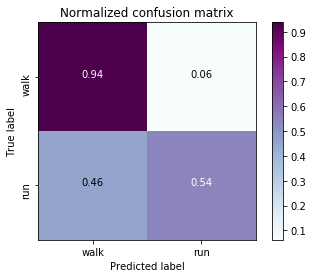

In [28]:
class_names = ["walk","run"]
# Plot normalized confusion matrix
plot_confusion_matrix(cm_small, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.savefig('./../Data-Visualization/images/Confusion_matrix_decisiontree', dpi=1000)

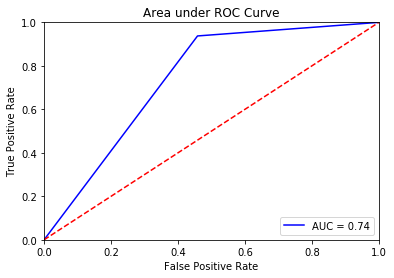

In [29]:
plot_roc_curve(Y_predict_gini_small,Y_test_small,"Area_under_roc_decision_tree")

In [238]:
main_features = []
for i in range(0,len(feature_imp)):
    if feature_imp[i] > 0:
        entry = []
        entry.append(df.columns.values[i+2])
        entry.append(feature_imp[i])
        main_features.append(entry)
main_features

[['Bin7,x', 0.019821900507519204],
 ['Bin10,x', 0.030280831919711874],
 ['Bin2,y', 0.0080237154150197606],
 ['TimeDiffPeaks-z', 0.1173989852329813],
 ['AvgAbsDiff-x', 0.0099825567369964639],
 ['AvgAbsDiff-y', 0.77710610745347142],
 ['AvgAcc-x', 0.0098892618142206977],
 ['AvgAcc-y', 0.0097972686810651813],
 ['AvgAcc-z', 0.017699372239014181]]

In [239]:
frame = df_unique.loc[:,['AvgAbsDiff-y','AvgAbsDiff-x']]

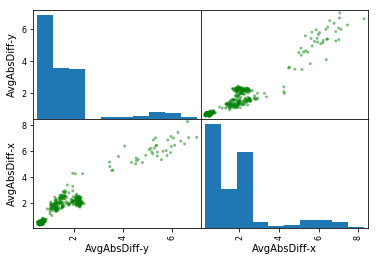

In [240]:
scatter_matrix(frame,color='g')
plt.savefig('./../Data-Visualization/images/scatter_matrix_AvgAbsDiffxy_dt_train_3.png',dpi=1000)

In [241]:
frame_test = df_unique_test.loc[:,['AvgAbsDiff-y','AvgAbsDiff-x']]

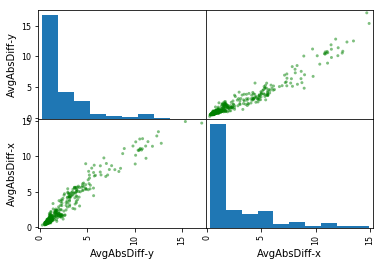

In [242]:
scatter_matrix(frame_test,color='g')
plt.savefig('./../Data-Visualization/images/scatter_matrix_AvgAbsDiffxy_dt_val_10.png',dpi=1000)

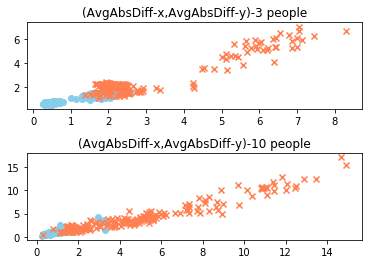

In [243]:
#walking and running data points for training set(3 people data)
plt.subplot(2,1,1)
walk_points = df_unique.loc[df_unique['Label'] == 'walking']
run_points = df_unique.loc[df_unique['Label'] == 'running']
plt.scatter(walk_points['AvgAbsDiff-x'],walk_points['AvgAbsDiff-y'],color='skyblue'
            ,marker='o',edgecolors=None)
plt.scatter(run_points['AvgAbsDiff-x'],run_points['AvgAbsDiff-y'],color='coral'
            ,marker='x',edgecolors=None)
plt.title("(AvgAbsDiff-x,AvgAbsDiff-y)-3 people")

#walking and running data points for test set(10 people data)
plt.subplot(2,1,2)
walk_points_test = df_unique_test.loc[df_unique_test['Label'] == 'walking']
run_points_test = df_unique_test.loc[df_unique_test['Label'] == 'running']
plt.scatter(walk_points_test['AvgAbsDiff-x'],walk_points_test['AvgAbsDiff-y'],color='skyblue'
            ,marker='o',edgecolors=None)
plt.scatter(run_points_test['AvgAbsDiff-x'],run_points_test['AvgAbsDiff-y'],color='coral'
            ,marker='x',edgecolors=None)
plt.title("(AvgAbsDiff-x,AvgAbsDiff-y)-10 people")
plt.subplots_adjust(hspace=0.5)
plt.savefig('./../Data-Visualization/images/scatter_AvgAbsDiffxy_dt_train_3_val_10.png',dpi=1000)

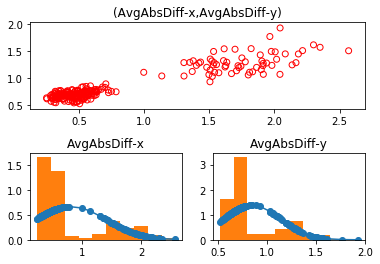

In [245]:
#walking points
walk_points = df_unique.loc[df_unique['Label'] == 'walking']
plt.subplot(2,2,(1,2))
plt.scatter(walk_points['AvgAbsDiff-x'],walk_points['AvgAbsDiff-y'],color = 'r'
            ,marker='o',facecolors='none',edgecolors=None)
plt.title("(AvgAbsDiff-x,AvgAbsDiff-y)")

#distribution of walking points using AvgAbsDiff-x
walk_points_AvgAbsDiffx = np.array(walk_points['AvgAbsDiff-x'])
sorted_values_AvgAbsDiffx = sorted(walk_points_AvgAbsDiffx)
fit = stats.norm.pdf(sorted_values_AvgAbsDiffx, np.mean(sorted_values_AvgAbsDiffx), np.std(sorted_values_AvgAbsDiffx))
plt.subplot(2,2,3)
plt.plot(sorted_values_AvgAbsDiffx,fit,'-o')
plt.hist(sorted_values_AvgAbsDiffx,normed=True)
plt.title("AvgAbsDiff-x")

#distribution of walking points using AvgAbsDiff-y
walk_points_AvgAbsDiffy = np.array(walk_points['AvgAbsDiff-y'])
sorted_values_AvgAbsDiffy = sorted(walk_points_AvgAbsDiffy)
fit = stats.norm.pdf(sorted_values_AvgAbsDiffy, np.mean(sorted_values_AvgAbsDiffy), np.std(sorted_values_AvgAbsDiffy))
plt.subplot(2,2,4)
plt.plot(sorted_values_AvgAbsDiffy,fit,'-o')
plt.hist(sorted_values_AvgAbsDiffy,normed=True)
plt.subplots_adjust(hspace=.5)
plt.title("AvgAbsDiff-y")
plt.show() 
plt.savefig('./../Data-Visualization/images/walk_AvgAbsDiffxy_dt.png',dpi=1000)

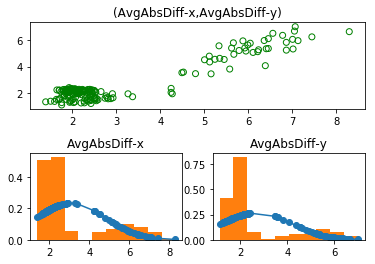

In [246]:
#running points
run_points = df_unique.loc[df_unique['Label'] == 'running']
plt.subplot(2,2,(1,2))
plt.scatter(run_points['AvgAbsDiff-x'],run_points['AvgAbsDiff-y'],color='g'
            ,marker='o',facecolors='none',edgecolors=None)
plt.title("(AvgAbsDiff-x,AvgAbsDiff-y)")

#distribution of running points using AvgAbsDiff-x
run_points_AvgAbsDiffx = np.array(run_points['AvgAbsDiff-x'])
sorted_values_run_AvgAbsDiffx = sorted(run_points_AvgAbsDiffx)
fit = stats.norm.pdf(sorted_values_run_AvgAbsDiffx, np.mean(sorted_values_run_AvgAbsDiffx), np.std(sorted_values_run_AvgAbsDiffx))
plt.subplot(2,2,3)
plt.plot(sorted_values_run_AvgAbsDiffx,fit,'-o')
plt.hist(sorted_values_run_AvgAbsDiffx,normed=True)
plt.title("AvgAbsDiff-x")

#distribution of running points using AvgAbsDiff-y
run_points_AvgAbsDiffy = np.array(run_points['AvgAbsDiff-y'])
sorted_values_run_AvgAbsDiffy = sorted(run_points_AvgAbsDiffy)
fit = stats.norm.pdf(sorted_values_run_AvgAbsDiffy, np.mean(sorted_values_run_AvgAbsDiffy), np.std(sorted_values_run_AvgAbsDiffy))
plt.subplot(2,2,4)
plt.plot(sorted_values_run_AvgAbsDiffy,fit,'-o')
plt.hist(sorted_values_run_AvgAbsDiffy,normed=True)
plt.title("AvgAbsDiff-y")
plt.subplots_adjust(hspace=.5)
plt.show() 
plt.savefig('./../Data-Visualization/images/run_AvgAbsDiffxy_dt.png',dpi=1000)